# Accessing Text Corpora and Lexical Resources

## Conditional Frequency Distributions

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

In [10]:
df = pd.read_csv('dataset1-bbc-text.csv')
df['num_chars'] = df['text'].apply(lambda x : len(x))
df['num_tokens'] = df['text'].apply(lambda x : len(word_tokenize(x)))
display(df.head(3))

,category,text,num_chars,num_tokens
0,tech,tv future in the hands of viewers with home th...,4333,773
1,business,worldcom boss left books alone former worldc...,1842,321
2,sport,tigers wary of farrell gamble leicester say ...,1342,257


,category,n
0,business,510
1,entertainment,386
2,politics,417
3,sport,511
4,tech,401


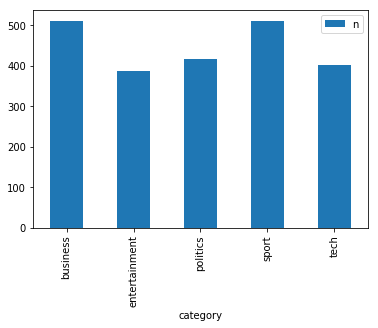

In [18]:
cat_count = df.groupby('category').size().reset_index(name='n')
display(cat_count)
cat_count.index = cat_count['category']
cat_count.plot(kind='bar', figsize=())

In [3]:
from nltk.corpus import gutenberg

In [4]:
# Get the file identifiers of the corpus
print(gutenberg.fileids()[:10])

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt']


In [5]:
f = 'austen-sense.txt'

In [6]:
# Get the raw text of Sense and Sensibility
print(gutenberg.raw(f)[:200])

[Sense and Sensibility by Jane Austen 1811]

CHAPTER 1


The family of Dashwood had long been settled in Sussex.
Their estate was large, and their residence was at Norland Park,
in the centre of their


In [7]:
# Get the words of Sense and Sensibility
wd = gutenberg.words(f)
s = set(wd) # Get the vocabulary of the text
print([w for w in s if len(w) > 12][:15]) # Find all words with 12 characters or more

['unintentional', 'comparatively', 'accommodations', 'reconciliation', 'affectionately', 'disinterestedness', 'demonstrations', 'mortification', 'distinguishing', 'consideration', 'insurmountable', 'administering', 'disagreements', 'disappointing', 'unexhilarating']


In [8]:
# Get the sentences of Sense and Sensibility
for st in gutenberg.sents(f)[:5]:
    print(st)
    print()

['[', 'Sense', 'and', 'Sensibility', 'by', 'Jane', 'Austen', '1811', ']']

['CHAPTER', '1']

['The', 'family', 'of', 'Dashwood', 'had', 'long', 'been', 'settled', 'in', 'Sussex', '.']

['Their', 'estate', 'was', 'large', ',', 'and', 'their', 'residence', 'was', 'at', 'Norland', 'Park', ',', 'in', 'the', 'centre', 'of', 'their', 'property', ',', 'where', ',', 'for', 'many', 'generations', ',', 'they', 'had', 'lived', 'in', 'so', 'respectable', 'a', 'manner', 'as', 'to', 'engage', 'the', 'general', 'good', 'opinion', 'of', 'their', 'surrounding', 'acquaintance', '.']

['The', 'late', 'owner', 'of', 'this', 'estate', 'was', 'a', 'single', 'man', ',', 'who', 'lived', 'to', 'a', 'very', 'advanced', 'age', ',', 'and', 'who', 'for', 'many', 'years', 'of', 'his', 'life', ',', 'had', 'a', 'constant', 'companion', 'and', 'housekeeper', 'in', 'his', 'sister', '.']



### Webtext Corpus

In [9]:
from nltk.corpus import webtext

In [10]:
# Get the fileids
print(webtext.fileids())

['firefox.txt', 'grail.txt', 'overheard.txt', 'pirates.txt', 'singles.txt', 'wine.txt']


In [11]:
f2 = 'overheard.txt'
print(webtext.raw(f2)[:200])

White guy: So, do you have any plans for this evening?
Asian girl: Yeah, being angry!
White guy: Oh, that sounds good.

Guy #1: So this Jack guy is basically the luckiest man in the world.
Guy #2: Why


### NPS Chat

In [12]:
from nltk.corpus import nps_chat

In [13]:
nps_chat.fileids()[:3]

['10-19-20s_706posts.xml', '10-19-30s_705posts.xml', '10-19-40s_686posts.xml']

In [14]:
for p in nps_chat.posts('10-19-20s_706posts.xml')[:15]:
    print(' '.join(p))

now im left with this gay name
:P
PART
hey everyone
ah well
NICK : U7
U7 is a gay name .
. ACTION gives U121 a golf clap .
:)
JOIN
hi U59
26 / m / ky women that are nice please pm me
JOIN
PART
there ya go U7


### Brown Corpus

In [15]:
from nltk.corpus import brown

In [16]:
# Get the files of the corpus
print(brown.fileids()[:20])

['ca01', 'ca02', 'ca03', 'ca04', 'ca05', 'ca06', 'ca07', 'ca08', 'ca09', 'ca10', 'ca11', 'ca12', 'ca13', 'ca14', 'ca15', 'ca16', 'ca17', 'ca18', 'ca19', 'ca20']


In [17]:
# Get the categories of the corpus
print(brown.categories())

['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']


In [18]:
# Filter for all words in one / multiple category(ies)
news_text = brown.words(categories=['news'])
print(news_text[:])
print(len(news_text))

# Filter for all words in 1 document
news_text2 = brown.words(fileids=['cg22'])
print(news_text2[:])
print(len(news_text2))

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]
100554
['Does', 'our', 'society', 'have', 'a', 'runaway', ',', ...]
2291


### Reuters Corpus

In [19]:
from nltk.corpus import reuters

In [20]:
# Get the files of the corpus
print(reuters.fileids()[:20])

['test/14826', 'test/14828', 'test/14829', 'test/14832', 'test/14833', 'test/14839', 'test/14840', 'test/14841', 'test/14842', 'test/14843', 'test/14844', 'test/14849', 'test/14852', 'test/14854', 'test/14858', 'test/14859', 'test/14860', 'test/14861', 'test/14862', 'test/14863']


In [21]:
# Get all categories of a document
print(reuters.categories(['test/14863']))

['gas', 'lead']


In [22]:
#Print a concordance for word with the specified context window. Word matching is not case-sensitive.
#https://stackoverflow.com/questions/29110950/python-concordance-command-in-nltk
# emma_text.concordance("surprize")

In [23]:
# from nltk.corpus import gutenberg
# #Get the sentences of a corpus using the sentence tokeniser
# gutenberg.sents('austen-sense.txt')

In [24]:
# from nltk.corpus import brown
# #use brown.words to get the words in a particular corpus
# news_text = brown.words(categories='news')
# #use nltk.FreqDist to get the frequency of words in a corpus
# fdist = nltk.FreqDist([w.lower() for w in news_text])
# #Count the number of modals in the corpus
# modals = ['can', 'could', 'may', 'might', 'must', 'will']
# for m in modals:
#     print("%s : %d" % (m, fdist[m]))

In [25]:
# # from nltk.corpus import reuters
# #Use corpus.fileids() to get all the files in the corpus
# #reuters.fileids()
# #Use corpus.categories() to get all categories of the corpus
# reuters.categories()[0:7]